# CS6140 Final Project Proposal: Walkability Index
### Team Members: James Fan, James Florez, Dominic Cauteruccio, Sara Spasojevic


## Step 0: Notebook Prep


In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

# Set global random state
random_state = 1

## Step 1: Data Preprocessing and Analysis

#### Load Data

In [3]:
data_url = "https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv"
raw_df = pd.read_csv(data_url, sep=",", header=0)
raw_df.head()



,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,0.0,73.595028,73.595028,1202,460.0,423.0,0.549,69,0.163121,39,0.092199,315,0.744681,412,99,122,191,0.240291,66,20,3,0,19,24,20,3,0,15,24,0,4,0,21,27,18,0.318182,6.250422,16.332625,0.896800,0.271757,0.040764,0.000000,0.258170,0.326109,0.271757,0.040764,0.000000,0.203818,0.326109,0.000000,0.054351,0.0,7.147222,0,0.156028,0.886264,0.763386,0.855442,0.662091,0.348912,0.526296,0.585916,0.287128,0.104101,0.276151,6.242424,5.287423e-03,23.534900,0.000000,10.655277,12.879623,115.981747,0.000000,60.873677,8.696240,34.784958,43.481198,362.10,0.0,0.000000,4.33,37.654717,0.003602,433601,303660,135362,53504,0.000398,0.785893,0.000358,0.841299,0.000525,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,0.0,119.829909,119.214200,710,409.0,409.0,0.466,0,0.000000,168,0.410758,241,0.589242,395,76,107,212,0.192405,25,7,0,3,15,0,7,0,3,13,0,0,2,0,10,4,11,0.400000,3.430799,5.955666,0.209707,0.058718,0.000000,0.025165,0.125824,0.000000,0.058718,0.000000,0.025165,0.109047,0.000000,0.000000,0.016777,0.0,3.640506,0,0.061125,0.835015,0.569986,0.831686,0.554458,0.197047,0.248481,0.271309,0.002033,0.068027,0.119048,15.800000,3.736300e-07,22.893366,0.755137,2.859482,19.278747,80.145600,5.340904,10.681807,10.681807,85.454458,5.340904,718.84,0.0,0.009516,4.33,23.126113,0.006099,386504,272135,236885,90089,0.000355,0.700531,0.000321,0.753958,0.000919,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,0.0,26.367053,26.367050,737,365.0,329.0,0.811,19,0.057751,143,0.434650,167,0.507599,463,136,189,138,0.293737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,13.843035,27.951553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.843035,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367879,0.000000,1.000000,0.000000,0.000000e+00,14.210509,6.128365,2.611430,5.470714,24.272717,24.272717,0.000000,24.272717,0.000000,0.000000,398.31,0.0,0.000000,3.00,72.818150,0.004071,404573,288925,230587,82815,0.000371,0.733281,0.000340,0.800475,0.000894,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,0.0,119.060687,119.060687,904,384.0,384.0,0.638,0,0.000000,43,0.111979,341,0.888021,431,60,69,302,0.139211,253,26,0,25,47,155,26,0,25,3,155,2,42,0,121,87,45,0.478261,3.225246,7.592767,2.124967,0.218376,0.000000,0.209977,0.394757,1.301857,0.218376,0.000000,0.209977,0.025197,1.301857,0.016798,0.352761,0.0,5

In [12]:
columns = ['Ac_Total', 'Ac_Water', 'Ac_Land', 'TotPop', 'P_WrkAge', 'AutoOwn0',\
           'AutoOwn1', 'AutoOwn2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', \
           'R_HiWageWk', 'TotEmp', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', \
           'D1A', 'D1B', 'D1C', 'D1D', 'D2C_TRPMX2', 'D2R_WRKEMP', 'D5AR', \
           'D5AE', 'D5BR', 'D5BE']

df = raw_df[columns]

#### Describe Data

In [13]:
# get column types
df.dtypes

Ac_Total       float64
Ac_Water       float64
Ac_Land        float64
TotPop           int64
P_WrkAge       float64
AutoOwn0         int64
AutoOwn1         int64
AutoOwn2p        int64
Workers          int64
R_LowWageWk      int64
R_MedWageWk      int64
R_HiWageWk       int64
TotEmp           int64
E_LowWageWk      int64
E_MedWageWk      int64
E_HiWageWk       int64
D1A            float64
D1B            float64
D1C            float64
D1D            float64
D2C_TRPMX2     float64
D2R_WRKEMP     float64
D5AR             int64
D5AE             int64
D5BR             int64
D5BE             int64
dtype: object

In [32]:
# describe numeric variables
df.describe()

,Ac_Total,Ac_Water,Ac_Land,TotPop,P_WrkAge,AutoOwn0,AutoOwn1,AutoOwn2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,E_LowWageWk,E_MedWageWk,E_HiWageWk,D1A,D1B,D1C,D1D,D2C_TRPMX2,D2R_WRKEMP,D5AR,D5AE,D5BR,D5BE
count,2.207400e+05,2.207400e+05,2.207400e+05,220740.000000,220740.00000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,220740.000000,2.207400e+05,2.207400e+05
mean,1.103567e+04,7.807248e+02,1.025494e+04,1479.863804,0.59474,48.126511,181.123960,318.612186,637.816753,146.015815,210.235820,281.565117,639.106487,146.436255,211.019806,281.650426,4.526966,10.428739,3.773612,8.298313,0.491936,0.425024,1.030618e+05,88536.521695,4.413897e+04,1.520207e+02
std,1.588982e+05,2.683978e+04,1.488759e+05,987.862242,0.10610,83.669015,146.710107,248.403557,420.866297,90.312972,135.076957,235.370220,2021.360339,357.650538,550.314594,1273.883797,13.873706,29.129998,46.392440,50.474119,0.234264,0.306272,1.531004e+05,130263.329763,3.854568e+05,2.038590e+05
min,1.096136e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-9.999900e+04,-9.999900e+04
25%,1.231824e+02,0.000000e+00,1.200676e+02,889.000000,0.54400,5.000000,90.000000,169.000000,384.000000,91.000000,127.000000,136.000000,69.000000,19.000000,25.000000,17.000000,0.301429,0.714507,0.075862,0.531225,0.326433,0.153326,9.260000e+03,9150.000000,-9.999900e+04,-9.999900e+04
50%,3.394946e+02,0.000000e+00,3.229443e+02,1265.000000,0.59500,21.000000,146.000000,269.000000,550.000000,128.000000,183.000000,226.000000,200.000000,54.000000,72.000000,59.000000,1.845611,4.320753,0.533630,3.140893,0.509930,0.389110,4.273400e+04,38964.000000,-9.999900e+04,-9.999900e+04
75%,2.325991e+03,1.973606e+01,2.141221e+03,1816.000000,0.64800,57.000000,231.000000,409.000000,792.000000,181.000000,263.000000,362.000000,548.000000,145.000000,198.000000,181.000000,4.159725,10.136846,2.157909,6.834936,0.685096,0.684399,1.251635e+05,105586.000000,4.775125e+04,3.174650e+04
max,4.055649e+07,5.455459e+06,3.914039e+07,55407.000000,1.00000,3834.000000,15285.000000,13158.000000,19255.000000,3639.000000,5014.000000,10683.000000,266101.000000,38083.000000,49946.000000,204309.000000,1481.257220,3133.578265,14032.760640,14111.660620,0.991059,1.000000,1.220602e+06,964355.000000,6.963967e+06,2.697797e+06


In [15]:
# show null values
print(df.isnull().sum())

Ac_Total         0
Ac_Water         0
Ac_Land          0
TotPop           0
P_WrkAge         0
AutoOwn0         0
AutoOwn1         0
AutoOwn2p        0
Workers          0
R_LowWageWk      0
R_MedWageWk      0
R_HiWageWk       0
TotEmp           0
E_LowWageWk      0
E_MedWageWk      0
E_HiWageWk       0
D1A            271
D1B              0
D1C              0
D1D              0
D2C_TRPMX2       0
D2R_WRKEMP       0
D5AR             0
D5AE             0
D5BR             0
D5BE             0
dtype: int64


In [16]:
# fill null variables with median
df = df.fillna(df.median())

Exploratory Data Analysis (EDA)

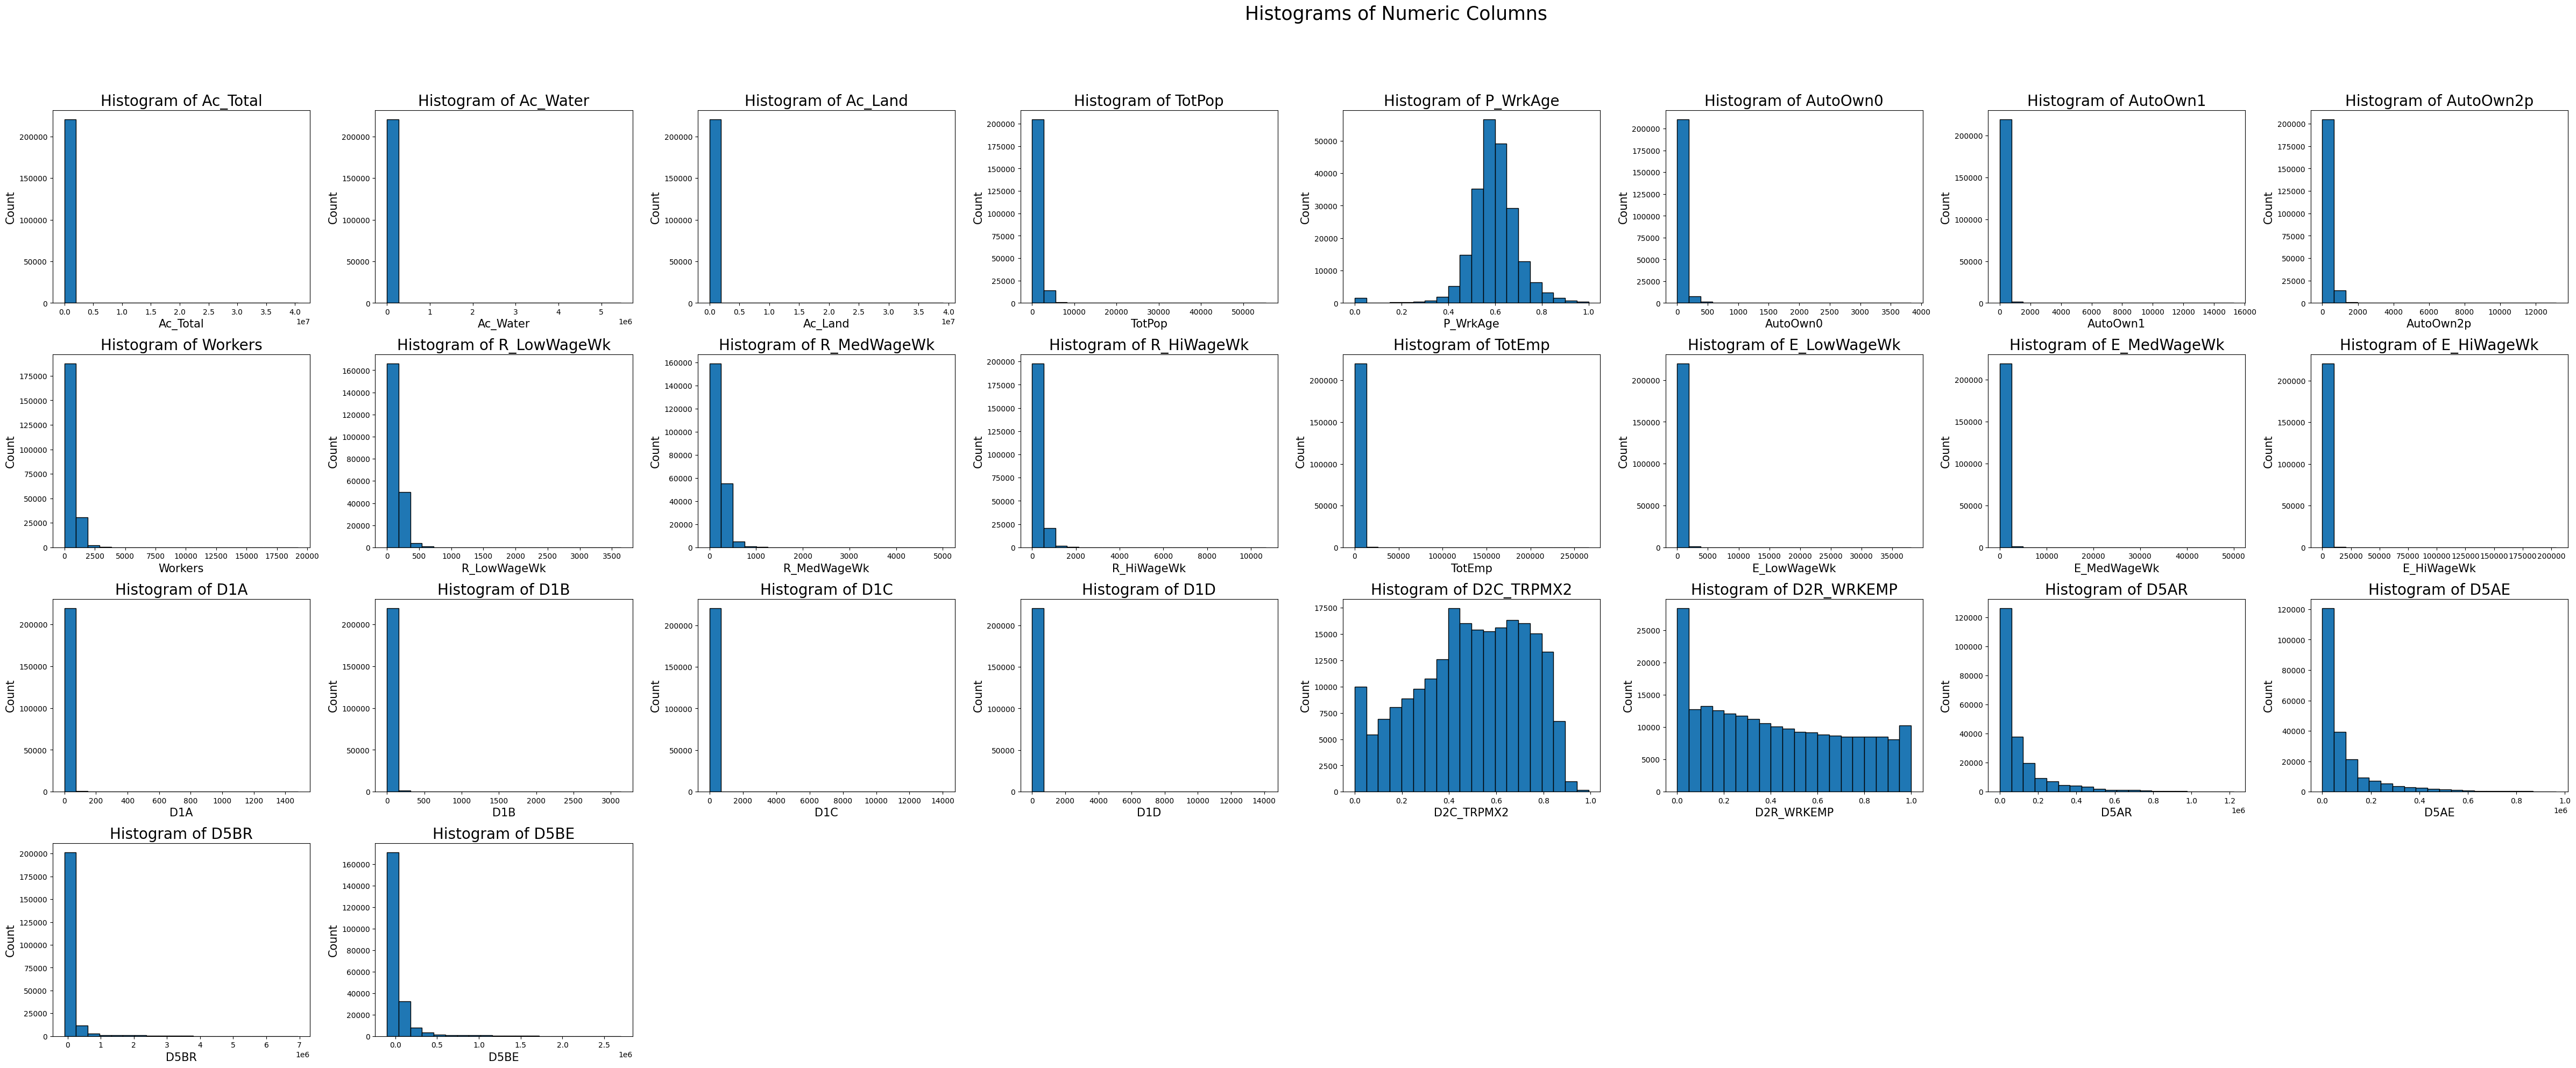

In [17]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for selected numeric columns with larger individual plots
plt.figure(figsize=(40, 30))
for i, column in enumerate(df.columns):
    plt.subplot(8, 8, i + 1)
    df[column].hist(bins=20, edgecolor='black', linewidth=1.0, grid=False)
    plt.title(f'Histogram of {column}', fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count', fontsize=15)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Histograms of Numeric Columns', x=0.65, y=1.25, fontsize=25)
plt.show()


In [31]:
# Bivariate Analysis
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot pairplot for selected columns
sns.pairplot(df[['Ac_Total', 'P_WrkAge', 'AutoOwn0', 'TotPop', 'TotEmp']])
plt.suptitle('Pairplot of Selected Columns', y=1.02, fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

## Step 2: Model Creation

#### Split and Standardize the Dataset

In [19]:
# Split data into X and Y
X = df
y = raw_df["NatWalkInd"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=random_state)

# Standardize X
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### Define Hyperparameters and Initialize Models

In [20]:
# Linear Regression
linear = linear_model.LinearRegression()

# Ridge Regression
ridge_alpha = 1.0
ridge = linear_model.Ridge(alpha=ridge_alpha)

# Random Forest
rf_estimators = 10
random_forest = ensemble.RandomForestRegressor(n_estimators=rf_estimators, random_state=random_state)

# Support Vector Machine (SVM)
svm_kernel = "rbf"
svm_c = 3
svm_max_iter = 2000
svm_model = svm.SVR(kernel=svm_kernel, C=svm_c, max_iter=svm_max_iter)

# Multi-Layer Perceptron (MLP)
mlp_num_layers = 5
mlp_num_neurons = 5
mlp_alpha = 0.0001
mlp_learning_rate_init = 0.001
mlp_max_iter = 1000
mlp = neural_network.MLPRegressor(
    hidden_layer_sizes=(mlp_num_neurons, mlp_num_layers),
    alpha=mlp_alpha,
    learning_rate_init=mlp_learning_rate_init,
    max_iter=mlp_max_iter,
    random_state=random_state)

## Step 3: Model Training and Evaluation

In [21]:
# Define a function to train and evaluate a regression model

def model_train_and_eval(model, X_train, X_test, y_train, y_test, model_name):
  # Given a regression model and data, this trains the model, plots the coefficients, and evaluates the performance.

  # Train the model with training data
  model.fit(X_train, y_train)

  # Make predicitions on test data
  y_pred = model.predict(X_test)

  # Plot the weights of the model
  if (model_name in ["Linear", "Ridge"]):
    plt.plot(X.columns, model.coef_)
    plt.title(f"Coefficients of {model_name} Regression Model")
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

  # Evaluate performance of the model
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

#### Linear Regression

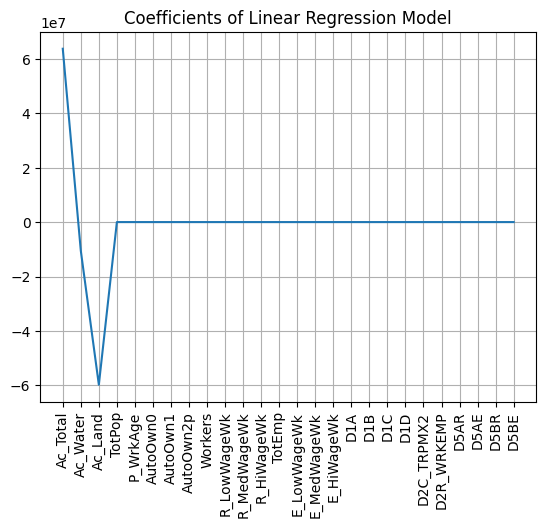

Mean Squared Error: 7.780483574149218
R-squared: 0.5945770424874679


In [22]:
model_train_and_eval(linear, X_train_std, X_test_std, y_train, y_test, "Linear")

#### Ridge Regression

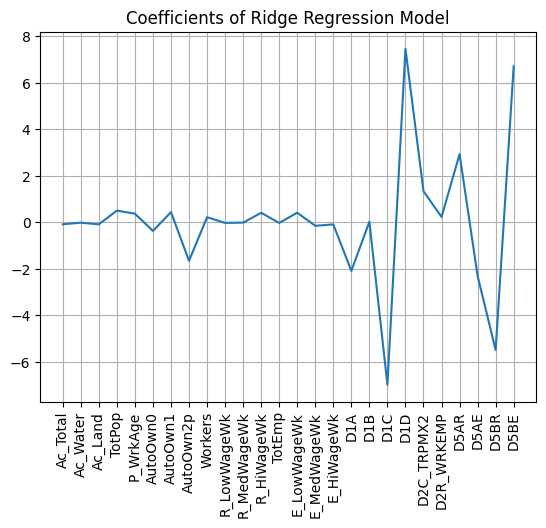

Mean Squared Error: 7.786628857599313
R-squared: 0.5942568260166861


In [23]:
model_train_and_eval(ridge, X_train_std, X_test_std, y_train, y_test, "Ridge")

#### Random Forest

In [24]:
model_train_and_eval(random_forest, X_train_std, X_test_std, y_train, y_test, "Random Forest")

Mean Squared Error: 1.6281356271008982
R-squared: 0.9151616278242775


#### Support Vector Machine

In [25]:
model_train_and_eval(svm_model, X_train_std, X_test_std, y_train, y_test, "SVM")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Mean Squared Error: 5.5555411105566685
R-squared: 0.7105136350254898


#### Multi-Layer Perceptron

In [26]:
model_train_and_eval(mlp, X_train_std, X_test_std, y_train, y_test, "MLP")

Mean Squared Error: 1.74629193959253
R-squared: 0.9090047763634901


## Step X?: Principal Component Analysis

#### Compare the performance of the strongest model with and without PCA

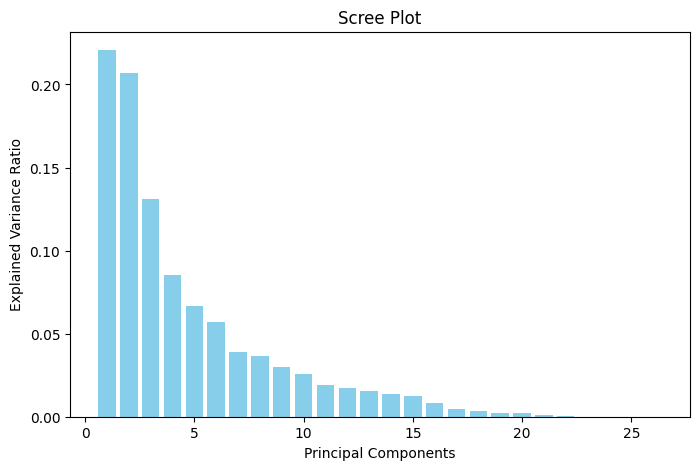

In [27]:
# PCA on the training set
pca = decomposition.PCA()  # Specify the number of components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
num_components = len(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.bar(np.arange(num_components) + 1, explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()